# RomExchange API Sandbox

Hello, 

RomExchange API Sandbox is currently a notebook where I can tinker with the Ro mobile Exchange API (see API Docs below).
By tinker I mean:
1. Making requests and obtaining data. 
2. Using Data in time series analysis.
3. Implementing time series models e.g. SarimaX

The data coveted is the historical market value of items in the game.

API Docs : https://jessicayeh.github.io/rom-exchange-openapi/#section/Recent-Changes

# Contents

1. **Importing Libraries**  
2. **Making requests**  
3. **Extract Transfer Load**  
4. **Cleaning Data**  
5. **Exploratory Data analysis**  
5. **Time series modeling**  

## 1. Importing Libraries

In [1]:
import pandas as pd
import requests
import json

from time import sleep

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
import seaborn as sns
sns.set()

from numpy import median


## 2. Making Requests

In [2]:
# Define URL and Headers for the get below:
# Pet material data:
url = 'https://www.romexchange.com/api?type=13&sort=change&sort_dir=desc&sort_server=global&range=all&page=1' 
headers = {'User-Agent': 'XY', 'Content-type': 'application/json'}

# To make a request over more periods of time will need to use the page query and set the page=2,3,4,5 etc. 
# Perhaps Automate this? Windows Task Scheduler?

In [3]:
# Make request for the data
r = requests.get(url, headers = headers)

In [4]:
r.status_code

200

In [5]:
# Obtain content of request payload
print(r.text)

[{"name":"Monster's Proof","type":13,"image":null,"global_sea_diff":-31.3,"global":{"all":{"data":[{"snap":true,"price":25000,"time":"2019-09-26T17:35:55Z"},{"snap":true,"price":94954,"time":"2019-09-30T08:46:46Z"},{"snap":false,"price":163845,"time":"2019-10-02T07:37:37Z"},{"snap":false,"price":150334,"time":"2019-10-04T07:51:31Z"},{"snap":false,"price":128320,"time":"2019-10-06T07:44:42Z"},{"snap":false,"price":104677,"time":"2019-10-08T08:16:54Z"},{"snap":false,"price":103055,"time":"2019-10-10T08:17:20Z"},{"snap":false,"price":100822,"time":"2019-10-12T08:22:39Z"},{"snap":false,"price":113308,"time":"2019-10-14T07:31:29Z"},{"snap":false,"price":107321,"time":"2019-10-16T08:10:05Z"},{"snap":false,"price":86126,"time":"2019-10-18T07:28:45Z"},{"snap":false,"price":84621,"time":"2019-10-20T07:47:49Z"},{"snap":false,"price":85909,"time":"2019-10-22T07:48:06Z"},{"snap":false,"price":64963,"time":"2019-10-25T07:40:16Z"},{"snap":false,"price":64942,"time":"2019-10-27T07:43:03Z"},{"snap":fa

## 3. Extract Transfer Load

In [6]:
import json
import pandas as pd
# Jsonify the data payload
j = r.json()
type(j)

list

In [7]:
j

[{'name': "Monster's Proof",
  'type': 13,
  'image': None,
  'global_sea_diff': -31.3,
  'global': {'all': {'data': [{'snap': True,
      'price': 25000,
      'time': '2019-09-26T17:35:55Z'},
     {'snap': True, 'price': 94954, 'time': '2019-09-30T08:46:46Z'},
     {'snap': False, 'price': 163845, 'time': '2019-10-02T07:37:37Z'},
     {'snap': False, 'price': 150334, 'time': '2019-10-04T07:51:31Z'},
     {'snap': False, 'price': 128320, 'time': '2019-10-06T07:44:42Z'},
     {'snap': False, 'price': 104677, 'time': '2019-10-08T08:16:54Z'},
     {'snap': False, 'price': 103055, 'time': '2019-10-10T08:17:20Z'},
     {'snap': False, 'price': 100822, 'time': '2019-10-12T08:22:39Z'},
     {'snap': False, 'price': 113308, 'time': '2019-10-14T07:31:29Z'},
     {'snap': False, 'price': 107321, 'time': '2019-10-16T08:10:05Z'},
     {'snap': False, 'price': 86126, 'time': '2019-10-18T07:28:45Z'},
     {'snap': False, 'price': 84621, 'time': '2019-10-20T07:47:49Z'},
     {'snap': False, 'price':

In [8]:
# Reference for Dataframe indexing below
j[0]

{'name': "Monster's Proof",
 'type': 13,
 'image': None,
 'global_sea_diff': -31.3,
 'global': {'all': {'data': [{'snap': True,
     'price': 25000,
     'time': '2019-09-26T17:35:55Z'},
    {'snap': True, 'price': 94954, 'time': '2019-09-30T08:46:46Z'},
    {'snap': False, 'price': 163845, 'time': '2019-10-02T07:37:37Z'},
    {'snap': False, 'price': 150334, 'time': '2019-10-04T07:51:31Z'},
    {'snap': False, 'price': 128320, 'time': '2019-10-06T07:44:42Z'},
    {'snap': False, 'price': 104677, 'time': '2019-10-08T08:16:54Z'},
    {'snap': False, 'price': 103055, 'time': '2019-10-10T08:17:20Z'},
    {'snap': False, 'price': 100822, 'time': '2019-10-12T08:22:39Z'},
    {'snap': False, 'price': 113308, 'time': '2019-10-14T07:31:29Z'},
    {'snap': False, 'price': 107321, 'time': '2019-10-16T08:10:05Z'},
    {'snap': False, 'price': 86126, 'time': '2019-10-18T07:28:45Z'},
    {'snap': False, 'price': 84621, 'time': '2019-10-20T07:47:49Z'},
    {'snap': False, 'price': 85909, 'time': '20

In [9]:
# make a dataframe out of just the 'data', price' dict headers and add the name of the item
j[0]['name']

dfglobal = pd.DataFrame(j[0]['global']['all']['data'])
dfglobal['name'] = j[0]['name']
dfglobal['server'] = 'Global'

dfsea = pd.DataFrame(j[0]['sea']['all']['data'])
dfsea['name'] = j[0]['name']
dfsea['server'] = 'Sea'

dfsea

df1 = dfglobal.append(dfsea)
df1

,snap,price,time,name,server
0,True,25000,2019-09-26T17:35:55Z,Monster's Proof,Global
1,True,94954,2019-09-30T08:46:46Z,Monster's Proof,Global
2,False,163845,2019-10-02T07:37:37Z,Monster's Proof,Global
3,False,150334,2019-10-04T07:51:31Z,Monster's Proof,Global
4,False,128320,2019-10-06T07:44:42Z,Monster's Proof,Global
...,...,...,...,...,...
45,False,71988,2019-12-26T11:46:24Z,Monster's Proof,Sea
46,False,65054,2019-12-29T11:17:46Z,Monster's Proof,Sea
47,False,68582,2020-01-02T11:33:07Z,Monster's Proof,Sea
48,False,68988,2020-01-08T11:08:31Z,Monster's Proof,Sea


## 4. Cleaning Data

In [10]:
#Cleaning the Date-Time column is necessary. 
# are there any missing values?
df1.isna().sum()


snap      0
price     0
time      0
name      0
server    0
dtype: int64

In [11]:
# Dealing with Date-Time column:
df1.time = pd.to_datetime(df1.time, errors='raise')
df1

,snap,price,time,name,server
0,True,25000,2019-09-26 17:35:55+00:00,Monster's Proof,Global
1,True,94954,2019-09-30 08:46:46+00:00,Monster's Proof,Global
2,False,163845,2019-10-02 07:37:37+00:00,Monster's Proof,Global
3,False,150334,2019-10-04 07:51:31+00:00,Monster's Proof,Global
4,False,128320,2019-10-06 07:44:42+00:00,Monster's Proof,Global
...,...,...,...,...,...
45,False,71988,2019-12-26 11:46:24+00:00,Monster's Proof,Sea
46,False,65054,2019-12-29 11:17:46+00:00,Monster's Proof,Sea
47,False,68582,2020-01-02 11:33:07+00:00,Monster's Proof,Sea
48,False,68988,2020-01-08 11:08:31+00:00,Monster's Proof,Sea


In [12]:
# check that the time column is indeed datetime:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   snap    100 non-null    bool               
 1   price   100 non-null    int64              
 2   time    100 non-null    datetime64[ns, UTC]
 3   name    100 non-null    object             
 4   server  100 non-null    object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 4.0+ KB


In [13]:
# Groupby Server and aggregate price means:
df1.groupby('server')['price'].mean()


server
Global    82983.50
Sea       71630.38
Name: price, dtype: float64

## 5. Exploratory Data Analysis

In [14]:
df1

,snap,price,time,name,server
0,True,25000,2019-09-26 17:35:55+00:00,Monster's Proof,Global
1,True,94954,2019-09-30 08:46:46+00:00,Monster's Proof,Global
2,False,163845,2019-10-02 07:37:37+00:00,Monster's Proof,Global
3,False,150334,2019-10-04 07:51:31+00:00,Monster's Proof,Global
4,False,128320,2019-10-06 07:44:42+00:00,Monster's Proof,Global
...,...,...,...,...,...
45,False,71988,2019-12-26 11:46:24+00:00,Monster's Proof,Sea
46,False,65054,2019-12-29 11:17:46+00:00,Monster's Proof,Sea
47,False,68582,2020-01-02 11:33:07+00:00,Monster's Proof,Sea
48,False,68988,2020-01-08 11:08:31+00:00,Monster's Proof,Sea


In [15]:
# #sqlite3 test - NEEDS WORK Learn this!
# import sqlite3
# conn = sqlite3.connect('ROMExchange.csv')
# print(conn)

# try:
#     conn.execute('DROP TABLE IF EXISTS `PetMaterials` ')
# except Exception as e:
#     raise(e)
# finally:
#     print('Table dropped')

# #Try to create a new table names PetMaterials
# try:
#     conn.execute(''' CREATE TABLE PetMaterials(
#                 ID INTEGER PRIMARY KEY,
#                 NAME TEXT NOT NULL,
#                 TIME datetime,
#                 SNAP TEXT NOT NULL,
#                 PRICE INTEGER ,
#                 SERVER TEXT )''')
#     print ("Table created Successfully");
    
# except Exception as e:
#     print(str(e))
#     print('Table Creation Failed!!')
# finally:
#     conn.close() # Close the connection to the database


In [16]:
# df1['snap'] = df1.snap.astype('str')
# df1['time'] = df1.time.astype('str')

In [17]:

# # this will convert pandas dtaframe to list of list
# itempricelist = df1.values.tolist()

# # lets make new connection to Insert crypto data in SQL DB
# conn = sqlite3.connect('ROMExchange.csv')

# # make a cursor - it will help with querying SQL DB
# cur = conn.cursor()

# try:
#     # will use ? sign to represent each column names inside VALUE().
#     cur.executemany("INSERT INTO PetMaterials(snap, name, time, price, server) VALUES (?,?,?,?,?)", itempricelist)
#     conn.commit()
#     print('Data Inserted Successfully')
# except Exception as e:
#     print(str(e))
#     print('Data Insertion Failed')
# finally:
#     # finally block will help with always closing the connection to DB even in case of error.
#     conn.close()

# # Output: Data Inserted Successfully

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025AACB1FFC8>]],
      dtype=object)

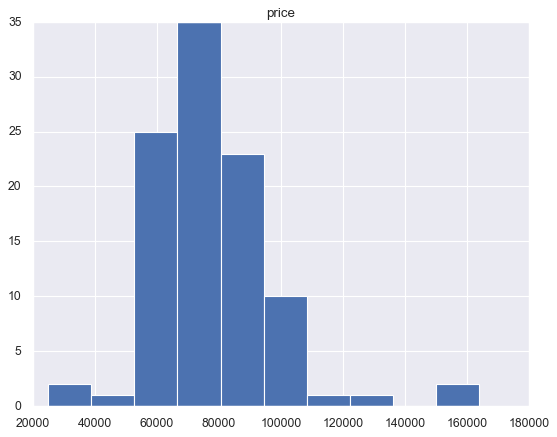

In [18]:
# Looking at the distribution of price
df1.hist(column='price')

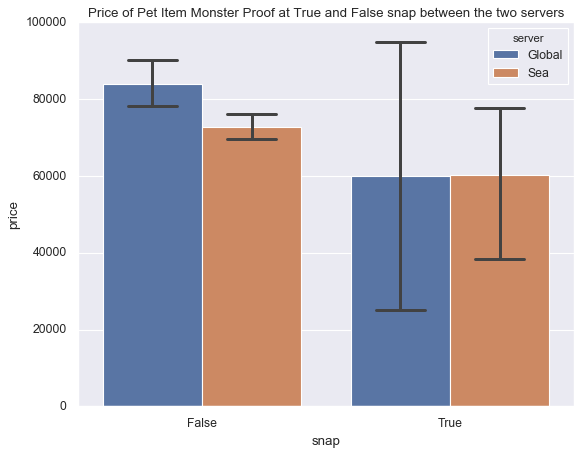

In [19]:
# Is Price higher when snap is True or False?

ax = sns.barplot(x="snap", y="price", hue='server', data=df1, capsize=0.2).set_title('Price of Pet Item Monster Proof at True and False snap between the two servers')

In [20]:
df1

,snap,price,time,name,server
0,True,25000,2019-09-26 17:35:55+00:00,Monster's Proof,Global
1,True,94954,2019-09-30 08:46:46+00:00,Monster's Proof,Global
2,False,163845,2019-10-02 07:37:37+00:00,Monster's Proof,Global
3,False,150334,2019-10-04 07:51:31+00:00,Monster's Proof,Global
4,False,128320,2019-10-06 07:44:42+00:00,Monster's Proof,Global
...,...,...,...,...,...
45,False,71988,2019-12-26 11:46:24+00:00,Monster's Proof,Sea
46,False,65054,2019-12-29 11:17:46+00:00,Monster's Proof,Sea
47,False,68582,2020-01-02 11:33:07+00:00,Monster's Proof,Sea
48,False,68988,2020-01-08 11:08:31+00:00,Monster's Proof,Sea


## 6. Time series modeling

In [21]:
# set time column to index
df1.set_index('time', inplace=True)

# This is the Arima alternative reddit post
# https://www.reddit.com/r/datascience/comments/gro5w8/alternative_approaches_to_arima_for_time_series/

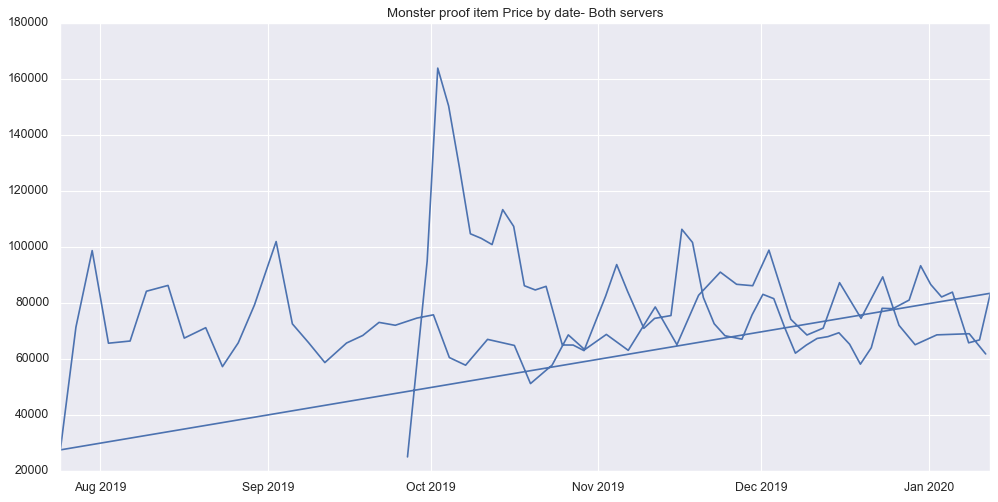

In [25]:
plt.figure(figsize=(15, 7))
plt.plot(df1.price)
plt.title('Monster proof item Price by date- Both servers')
plt.grid(True)
plt.show()
